## Agregando términos polinómicos a nuestra regresión

In [ ]:
# Módulos
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = loadmat("./data/data3.mat.")
X_train = np.vstack([df['X'], df['Xtest']])
y_train = np.vstack([df['y'],df['ytest']])
print(X_train.shape)
print(y_train.shape)
X_test = df['Xval']
y_test = df['yval']
print(X_test.shape)
print(y_test.shape)

(33, 1)
(33, 1)
(21, 1)
(21, 1)


(-50.0, 49.217408789459505)

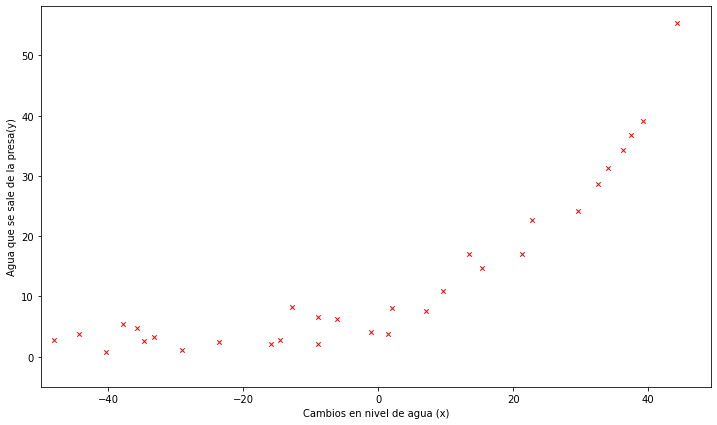

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X_train, y_train, s=20, c='r', marker='x', linewidths=1)
plt.xlabel('Cambios en nivel de agua (x)')
plt.ylabel('Agua que se sale de la presa(y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)

In [ ]:
# Datos de entrenamiento
X_fit = np.arange(-50, 50, 1)[:, np.newaxis]
lr = LinearRegression()
pr = LinearRegression()
polinomial = PolynomialFeatures(degree=2)
X_quad = polinomial.fit_transform(X_train)
lr.fit(X_train, y_train)
pr.fit(X_quad, y_train)

y_lin_fit = lr.predict(X_fit)
y_quad_fit = pr.predict(polinomial.fit_transform(X_fit))

In [ ]:
# Datos de prueba
X_test_quad = polinomial.fit_transform(X_test)
y_lin_pred = lr.predict(X_test)
y_quad_pred = pr.predict(X_test_quad)
print(f' MSE lineal:{mean_squared_error(y_test, y_lin_pred):.3f}, polinomial: {mean_squared_error(y_test, y_quad_pred):.3f}')
print(f' R^2 lineal: {r2_score(y_test, y_lin_pred):.3f}, polinomial: {r2_score(y_test, y_quad_pred):.3f}')

 MSE lineal:57.905, polinomial: 13.766
 R^2 lineal: 0.642, polinomial: 0.915


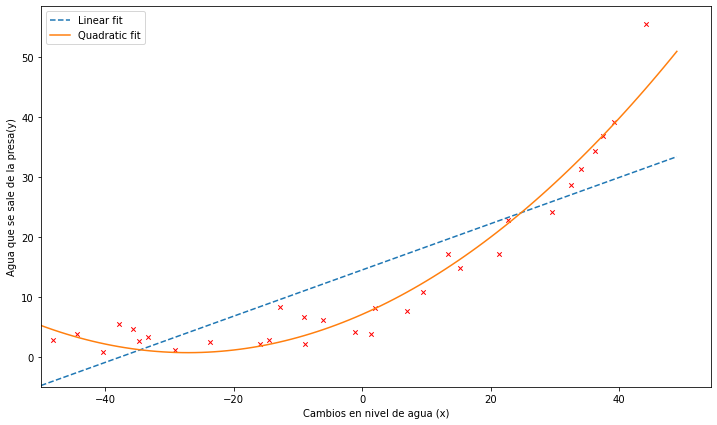

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.scatter(X_train, y_train, s=20, c='r', marker='x', linewidths=1)
plt.xlabel('Cambios en nivel de agua (x)')
plt.ylabel('Agua que se sale de la presa(y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc='upper left')